Note: you may need to restart the kernel to use updated packages.
Series([], dtype: int64)
Note: you may need to restart the kernel to use updated packages.
Number of duplicate rows: 0


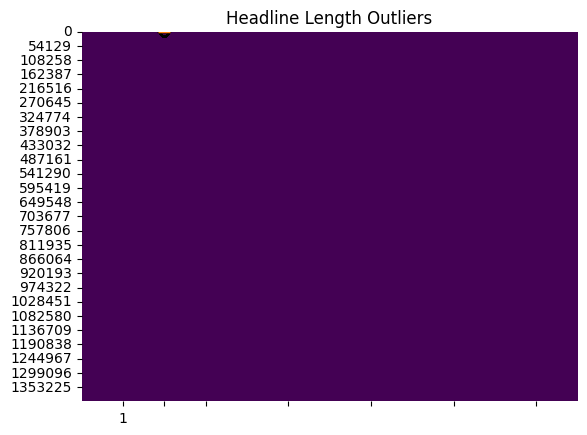

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


Text(0.5, 1.0, 'Number of Articles per Publisher')

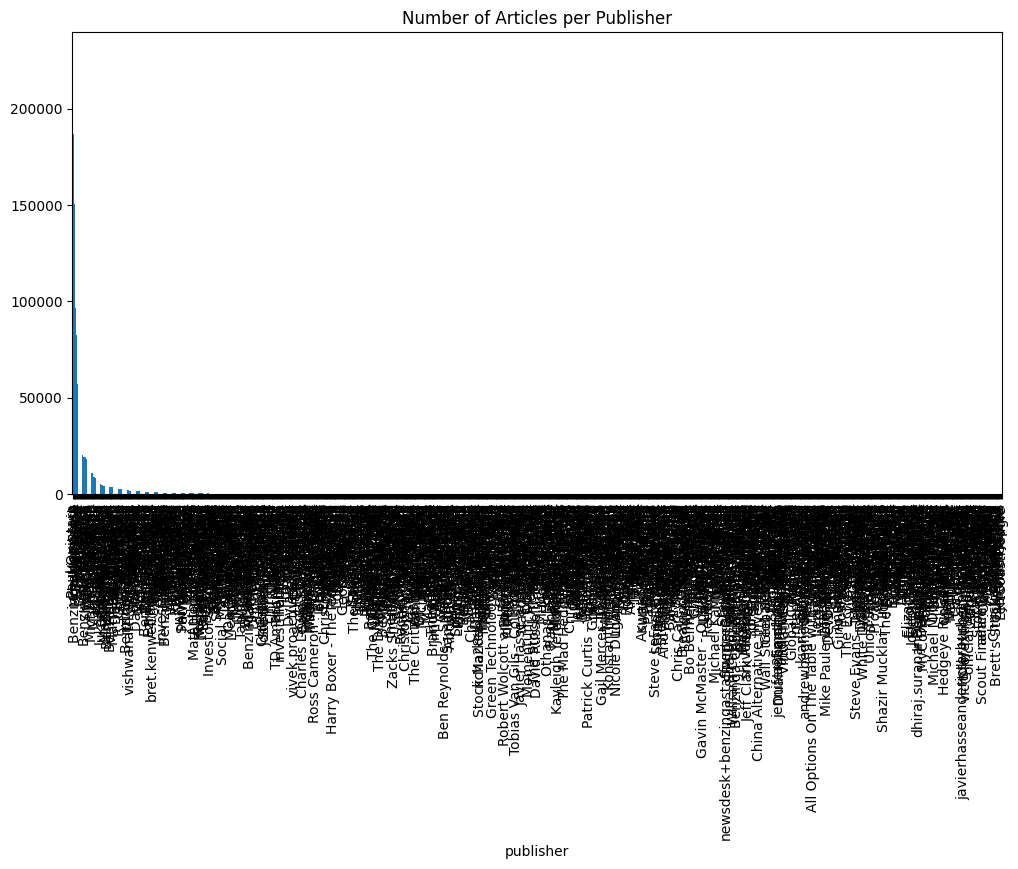

In [ ]:
%pip install pandas
import pandas as pd
df = pd.read_csv('data/raw_analyst_ratings.csv')
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
%pip install seaborn
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
# Drop duplicates
df = df.drop_duplicates()
import matplotlib.pyplot as plt
df['headline_length'] = df['headline'].str.len()
plt.boxplot(df['headline_length'].dropna())
plt.title("Headline Length Outliers")
plt.show()
df_cleaned = df.dropna(subset=['headline', 'publisher', 'date'])
df_cleaned.to_csv('data/raw_analyst_ratings_cleaned.csv', index=False)
# Headline length
df=pd.read_csv('data/raw_analyst_ratings_cleaned.csv')
df['headline_length'] = df['headline'].str.len()
print(df['headline_length'].describe())
#article per publisher
article_per_publisher = df['publisher'].value_counts()
print(article_per_publisher)
# Plotting article counts per publisher
plt.figure(figsize=(12, 6)) 


In [ ]:
article_per_publication_date = pd.to_datetime(df['publication_date'])
df['publication_date'].dt.date.value_counts().sort_index().plot(kind='line')
print("Publication dates and counts:")


In [ ]:
%pip install scikit-learn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['headline'].dropna())

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

terms = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Topic #{idx}:")
    print([terms[i] for i in topic.argsort()[-10:]])